!jt -t chesterish




In [1]:
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 

import statistics as stat

from math import *
import pandas as pd
from matplotlib.colors import ListedColormap 
import statistics as stat
from sklearn.linear_model import LinearRegression

In [2]:

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)

0.5595238095238095

In [3]:
N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
import statistics as stat
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]
mean1=[1.5,1.5]
mean2=[0,0]
cov1=[[2,-0.8],[-0.8,2]]
cov2=[[1,0],[0,1]] 

In [4]:
group1=np.random.multivariate_normal(mean1, cov1, 1000)
group2=np.random.multivariate_normal(mean2, cov2, 2000)



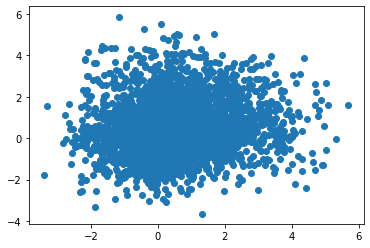

In [5]:

X=np.concatenate((group1,group2),axis=0)
plt.scatter(X[:,0],X[:,1])


In [6]:

m1=group1.mean(0)
m2=group2.mean(0)
diag_sigma1=np.diag(np.cov(group1))
diag_sigma2=np.diag(np.cov(group2))
Y1=[1 for i in range(1000)]
Y2=[0 for i in range (2000)]
Y=Y1+Y2
Y=np.array(Y)

In [7]:
np.cov(group1[:,0],group1[:,1])



array([[ 1.97222955, -0.7742019 ],
       [-0.7742019 ,  1.91105975]])

In [8]:
np.cov(group2[:,0],group2[:,1])

array([[ 1.01928472e+00, -2.41975788e-04],
       [-2.41975788e-04,  1.01833353e+00]])

on remarque queles valeurs theoriques de la matrice de covariance et des moyennes sont differentes 

In [9]:
x1=X[:,0]
x2=X[:,1]
x1_min, x1_max=min(x1), max(x1)
x2_min, x2_max=min(x2), max(x2)
Neval=15;h1=(x1_max-x1_min)/Neval;h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2))

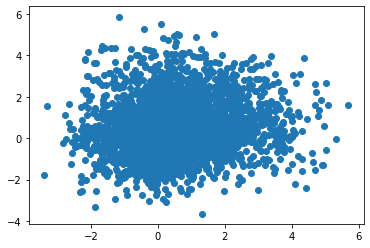

In [10]:


plt.scatter(X[:,0],X[:,1])
X1=np.c_[X,Y]




In [11]:
X1=np.c_[X,Y]
X2=X1
np.random.shuffle(X1)


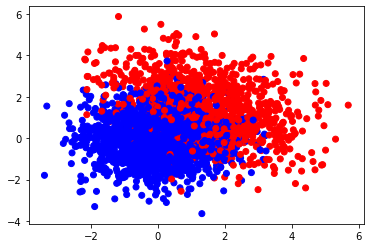

In [12]:

color = ['blue' if y==0 else 'red' for y in X1[:,2]]
plt.scatter(X1[:,0],X1[:,1] , c=color)

Text(0, 0.5, 'x2')

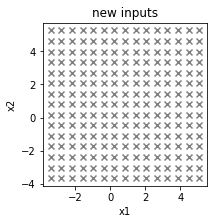

In [13]:
figure = plt.figure(figsize=(10,3))
ax=plt.subplot(1,3,1)
ax.scatter(x1Eval,x2Eval,c="gray",marker="x")
ax.set_title("new inputs")
ax.set_xlabel('x1')
ax.set_ylabel('x2')

#ax.scatter(x1,x2,c=predxxclass,marker='x', cmap=mycolormap) 
#ax.set_title('MAP Bayes C. on new inputs')
#ax.set_xlabel('x1')
#ax.set_ylabel('x2')
#ax = plt.subplot(1,3,3)
#Z=predxxclass
#ax.set_title('MAP Bayes C. Decision boudaries')
#Z = Z.reshape(x1Eval.shape)
#cm = plt.cm.RdBu
#ax.contourf(x1Eval, x2Eval, Z, cmap=cm, alpha=.8)
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

donc du training set je dois trouver les param mu et sigma de y=0 et y=1 ca me donne pour nuveau x la p(x sachant y)

In [14]:
pi1=1-Y.mean()
pi2=1-pi1
from math import sqrt, pi, exp
def dnorm(x,mu,sigma):
   a=1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))
   return (a)



In [15]:
def estimator_density(X_train,Y_train):
    X1=X_train[:,0]
    X2=X_train[:,1]
    Y=Y_train
    a1=0
    b1=0
    a2=0
    b2=0
    c0=0
    c1=0
    for i in range(len(Y)):
        if(Y[i]==0):
            a1=a1+X1[i]
            a2=a2+X2[i]
            c0=c0+1
        else:
            b1=b1+X1[i]
            b2=b2+X2[i]
            c1=c1+1
    mu10=a1/c0
    mu20=a2/c0
    mu11=b1/c1
    mu21=b2/c1
    sig10=0
    sig20=0
    sig11=0
    sig21=0
    
    for i in range (len(Y)):
        if ( Y[i]==0):
            sig10=sig10+(1/(c0-1))*pow((X1[i]-mu10),2)
            sig20=sig20+(1/(c0-1))*pow((X2[i]-mu20),2)
        else:
            sig11= sig11+(1/(c1-1))*pow((X1[i]-mu11),2)
            sig21=sig21+(1/(c1-1))*pow((X2[i]-mu21),2)
    return([mu10,mu20,sig10,sig20,mu11,mu21,sig11,sig21])
        

In [16]:

pi1=(sum(Y)/len(Y))#(proba y =1)
pi0=1-pi1 #proba y=0

In [17]:
#je vais calculer pour chaque nouvelle entrée (x1,x2) P(y=0 sachant x)
#p(Y=1 sachant X et je vais prendre le plus grand)
def naive_bayes_class(X_test):

    X1=X_test[:,0]
    X2=X_test[:,1]
    Y_test=[0]*len(X1)
    for i in range(len(X1)):
        p0=pi0*dnorm(X1[i],mu10,sig10)*dnorm(X2[i],mu20,sig20) 
        p1=pi1*dnorm(X1[i],mu11,sig11)*dnorm(X2[i],mu21,sig21)
        if (p0<=p1):
            Y_test[i]=1
        else:
            Y_test[i]=0
    return(Y_test)
    
    

#on va tester le code pour voir ce que ca donne 

In [18]:
np.random.shuffle(X1)
X_train= X1[0:2800,0:2]
X_test=X1[2800:,0:2]
Y_train=X1[0:2800,2]
Y_test=X1[2800:,2]

In [19]:
X=X1[0:2999,0:2]
Y=X1[0:2999,2]

In [20]:
a=estimator_density(X_train,Y_train)
mu10=a[0]
mu20=a[1]
sig10=a[2]
sig20=a[3]
mu11=a[4]
mu21=a[5]
sig11=a[6]
sig21=a[7]

In [21]:

Y_pred=naive_bayes_class(X_test)



In [22]:
def perf(Y,Y_pred):
    TN=0
    FN=0
    FP=0
    TP=0
    for i in range(len(Y)):
        if(Y[i]==0 & Y_pred[i]==0):
            TN=TN+1
        elif(Y[i]==0 & Y_pred[i]==1):
            FP=FP+1
        elif (Y[i]==1 & Y_pred[i]==1):
            TP=TP+1
        else:
            FN=FN+1
    acc=(TP+TN)/len(Y)
    recall=TP/(FN+TP)
    prec=TP/(FP+TP)
    F_sco=2*(prec*recall)/(prec+recall)
    return([TN,FN,FP,TP,acc,recall,prec,F_sco])


In [23]:
type(Y_pred)

list

In [24]:
perf(Y_test,Y_pred)

[138, 18, 0, 44, 0.91, 0.7096774193548387, 1.0, 0.8301886792452831]

In [25]:
#def Naive_bayes(X,Y,pi1,m1,diag_sigma1,pi2,m2, diag_sigma2):
    #posteriors=np.zeros(len(X),2)
  # pour chaque ligne de X on va calculer la proba je crois
    #for i in range ( len(posteriors)):
       # posteriors[i,0]=pi1*dnorm(X[i,0],mu1[0],diag_sigma1[0])*dnorm(X[i,1],mu1[1],diag_sigma1[1])
       # posteriors[i,1]=pi1*dnorm(X[i,0],mu2[0],diag_sigma2[0])*dnorm(X[i,1],mu2[1],diag_sigma2[1])
   # return (posteriors)
     

# THE SCIKIT LEARN LIBRARY

# code fro decision boundaries 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

#  Naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnbfit=gnb.fit(X_train, Y_train)
y_pred=gnbfit.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.905


In [28]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
metrics.auc(fpr, tpr)

0.873422159887798

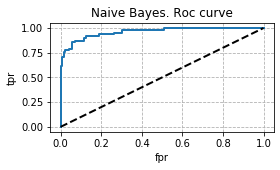

In [29]:
y_proba=gnbfit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=metrics.roc_curve(Y_test, y_proba)
figure=plt.figure(figsize=(4,2))
plt.plot(fpr,tpr, linewidth=2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth=2)
plt.grid(linestyle='dashed')
plt.show()

In [30]:
auc=metrics.roc_auc_score(Y_test, y_proba)
print(auc)


0.9616643291257596


# Evaluation of the predictive power capabilities


In [31]:
E_test=[0]*5

for i in range(5):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=1/3)
    gnb=GaussianNB()
    gnbfit=gnb.fit(x_train, y_train);
    y_pred=gnbfit.predict(x_test)
    E_test[i]=(y_test!=y_pred).sum()/len(y_test)
    print("Error on the test data set %5.2f->",E_test[i])


Error on the test data set %5.2f-> 0.133
Error on the test data set %5.2f-> 0.122
Error on the test data set %5.2f-> 0.138
Error on the test data set %5.2f-> 0.144
Error on the test data set %5.2f-> 0.145


beaucoup de parametre variance grande 

In [32]:
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [33]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
acc_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [34]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
acc_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold)
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [35]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
recall_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'recall')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [36]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
recall_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'recall')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [37]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
precision_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'precision')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [38]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
precision_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'precision')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [39]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
f1_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'f1')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [40]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
f1_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'f1')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [41]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
auc_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'roc_auc')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

In [42]:

kfold = model_selection.KFold(n_splits=10)
model_kfold = GaussianNB()
auc_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'roc_auc')
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))scoring= 'recall_macro'

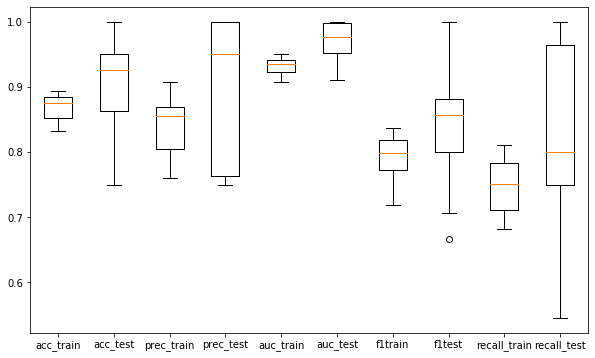

In [43]:
plt.figure(figsize=(10,6))
plt.boxplot((acc_train, acc_test, precision_train, precision_test,auc_train,auc_test,f1_train,f1_test,recall_train,recall_test), sym="o",labels=["acc_train", "acc_test","prec_train","prec_test","auc_train","auc_test","f1train","f1test","recall_train","recall_test"])
plt.show()


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

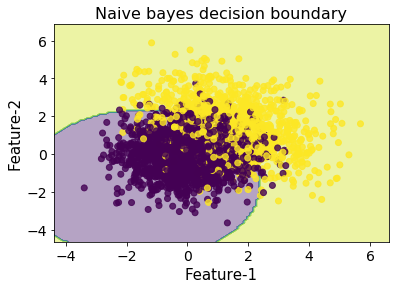

In [44]:
plt.figure()
plt.title("Naive bayes decision boundary", fontsize=16)
plot_decision_boundaries(X_train,Y_train,GaussianNB)

# classification learning machines

# LDA 

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(solver="svd",store_covariance=True)


In [54]:
np.random.shuffle(X1)
X_train= X1[0:2800,0:2]
X_test=X1[2800:,0:2]
Y_train=X1[0:2800,2]
Y_tesT=X1[2800:,2]

In [55]:
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

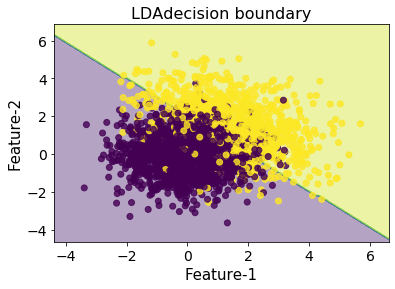

In [56]:
plt.figure()
plt.title("LDAdecision boundary", fontsize=16)
plot_decision_boundaries(X_train,Y_train,LinearDiscriminantAnalysis,solver="svd")

In [57]:
Y_pred=lda.fit(X_train,Y_train).predict(X_test)

In [58]:
lda.covariance_ #je sais pas ce que ca renvoie quelle covariance 

array([[ 1.33025316, -0.26109967],
       [-0.26109967,  1.31180214]])

In [59]:
lda.means_[0]

array([0.00551403, 0.02507679])

In [60]:
lda.means_[1]

array([1.48346475, 1.51258196])

pour les moyennes  c'est bon c'est assez peoche des bonnes valeurs de chaque classe 
pour la covariance par contre je sais pas ce que ca fait  je crois que LDA il suppose que tout le monde a la meme covariance ceci explque cela 

In [61]:
conf=sklearn.metrics.confusion_matrix(Y_test, Y_pred)
TP=conf[0,0]
TN=conf[1,1]
FP=conf[0,1]
FN=conf[1,0]

In [62]:
conf

array([[118,  13],
       [ 22,  47]])

In [63]:
FP

13

In [64]:
rec=sklearn.metrics.recall_score(Y_test, Y_pred)

In [65]:
acc=sklearn.metrics.accuracy_score(Y_test, Y_pred)

In [66]:
prec=sklearn.metrics.precision_score(Y_test, Y_pred)

In [67]:
f1=sklearn.metrics.f1_score(Y_test, Y_pred)

# QDA


In [68]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [69]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_train,Y_train).predict(X_test)

In [70]:
confqda=sklearn.metrics.confusion_matrix(Y_test, y_pred)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

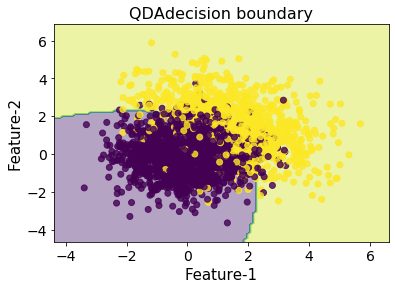

In [71]:
plt.figure()
plt.title("QDAdecision boundary", fontsize=16)
plot_decision_boundaries(X_train,Y_train,QuadraticDiscriminantAnalysis)

In [72]:
 qda.fit(X_train,Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [73]:
qda.means_

array([[0.00551403, 0.02507679],
       [1.48346475, 1.51258196]])

In [74]:
qda.covariance_

[array([[ 1.0147989 , -0.00612483],
        [-0.00612483,  1.01092703]]), array([[ 1.96673603, -0.77380418],
        [-0.77380418,  1.91896161]])]

weih pour le qda en moyenne c'est pas mal c'est assez proche en variance c'est un peu moins bien mais ca joue quand meme 

In [75]:
recq=sklearn.metrics.recall_score(Y_test, y_pred)
accq=sklearn.metrics.accuracy_score(Y_test, y_pred)
precq=sklearn.metrics.precision_score(Y_test, y_pred)
f1q=sklearn.metrics.f1_score(Y_test, y_pred)

# Logistic regression

In [76]:
from sklearn import linear_model
logreg=linear_model.LogisticRegression(C=1e5,solver='lbfgs')

In [77]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred=logreg.predict(X_test)

In [79]:
conflr=sklearn.metrics.confusion_matrix(Y_test, y_pred)

In [80]:
conflr

array([[118,  13],
       [ 21,  48]])

In [81]:
reclr=sklearn.metrics.recall_score(Y_test, y_pred)
acclr=sklearn.metrics.accuracy_score(Y_test, y_pred)
preclr=sklearn.metrics.precision_score(Y_test, y_pred)
f1lr=sklearn.metrics.f1_score(Y_test, y_pred)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

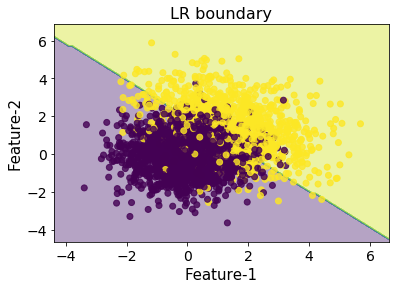

In [82]:
plt.figure()
plt.title("LR boundary", fontsize=16)
plot_decision_boundaries(X_train,Y_train,LogisticRegression,solver='lbfgs')

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier


ON VA ESSAYER de trouver le bon K a appliquer c'est a dire le K qui donne la plus grande accuracy 

In [90]:
k_range=np.arange(55)+1 # donc entre 1 et 25
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred=knn.predict(X_test)
    scores_list.append(sklearn.metrics.accuracy_score(Y_test, y_pred))

   

Text(0, 0.5, 'Testing accuracy')

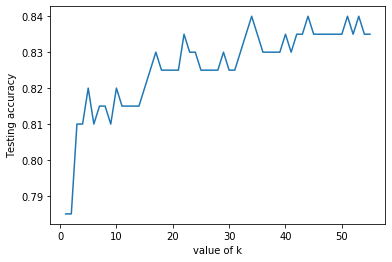

In [91]:
plt.plot(k_range, scores_list)
plt.xlabel("value of k")
plt.ylabel("Testing accuracy")


In [92]:
np.array(scores_list).argmax()
#scores_list[21]

33

l'accuracy la plus grande est obtenu pour K=34


In [93]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, Y_train)
y_pred=knn.predict(X_test)
#demander comment obtenir la moyenne 

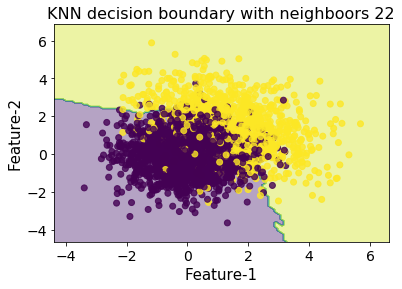

In [94]:
plt.figure()
plt.title("KNN decision boundary with neighboors 22", fontsize=16)
plot_decision_boundaries(X_train, Y_train, KNeighborsClassifier,n_neighbors=34)
plt.show()

# How to choose an appropriate classifier

In [95]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = GaussianNB()
bayes_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')

kfold = model_selection.KFold(n_splits=20)
model_kfold = GaussianNB()
bayes_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'accuracy')

In [96]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = LinearDiscriminantAnalysis()
lda_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')

kfold = model_selection.KFold(n_splits=20)
model_kfold = LinearDiscriminantAnalysis()
lda_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'accuracy')

In [97]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = QuadraticDiscriminantAnalysis()
qda_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')

kfold = model_selection.KFold(n_splits=20)
model_kfold = QuadraticDiscriminantAnalysis()
qda_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'accuracy')


In [98]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = LogisticRegression(solver='lbfgs')
lr_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')

kfold = model_selection.KFold(n_splits=20)
model_kfold = LogisticRegression(solver='lbfgs')
lr_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'accuracy')



In [99]:
kfold = model_selection.KFold(n_splits=20)
model_kfold = KNeighborsClassifier()
knn_train = model_selection.cross_val_score(model_kfold, X_train, Y_train, cv=kfold,scoring= 'accuracy')

kfold = model_selection.KFold(n_splits=20)
model_kfold = KNeighborsClassifier()
knn_test = model_selection.cross_val_score(model_kfold, X_test, Y_test, cv=kfold,scoring= 'accuracy')




In [100]:
train_acc=np.array([bayes_train, lda_train,qda_train,lr_train,knn_train])

In [101]:
train_acc=pd.DataFrame(np.transpose(train_acc),columns=['bayes', 'lda', 'qda', 'lr', 'knn'])

In [102]:
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline


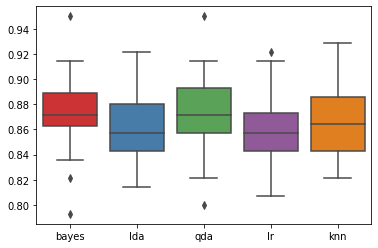

In [103]:
ax = sns.boxplot(data=train_acc, palette="Set1")

In [104]:
test_acc = np.array([bayes_test, lda_test,qda_test,lr_test,knn_test])
test_acc =pd.DataFrame(np.transpose(test_acc),columns=['bayes', 'lda', 'qda', 'lr', 'knn'])

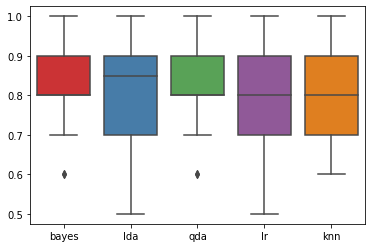

In [106]:
ax = sns.boxplot(data=test_acc, palette="Set1")